# _Задача №1, Вариант 28_
## _Журавлев Алексей, группа 323_

## Условие задачи

Используя схему бегущего счета и итерационные методы, решить задачу для квазилинейного уравнения переноса:

$$\left\{\begin{aligned}
\frac{\partial u}{\partial t} - \frac{1}{1+u}\frac{\partial u}{\partial x}  = 0, -1 \leq x < 0\\
u(x,0)= \cos \frac{\pi x}{2}\\
u(0,t) = e^{-t} \\ 
\end{aligned}\\
\right. $$
  


###### Исследование характеристик

В точке $(x,t)=(0,0)$ значение функции $u=1$, граничные и начальные условия согласованы.

Ищем характиристики задачи:

$dt=-(1+u)dx$

$t=(1+u_0)(x_0-x)+t_0$

Используем начальные и граничные условия:
    
1) $t_0=0:  t=(1+\cos \frac{\pi x_o}{2})(x_0-x)$

2) $x_0=0:  t=(1+e^{-t_o})(-x)+t_0$

Графики семейств характеристик в заданных областях:    
    

<IPython.core.display.Javascript object>


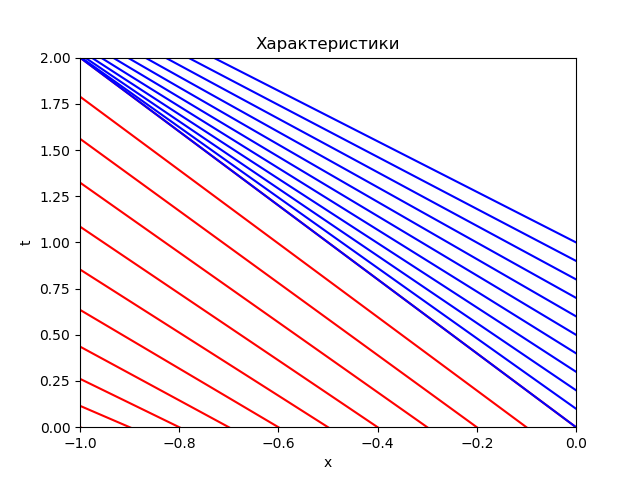

In [42]:
%matplotlib notebook
from math import *
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm


def ch1(x):
    return [((1+cos(0.5*pi*x0))*(x0-x)) for x0 in np.arange(-1,0.1,0.1)]

def ch2(x):
    return [((1+exp(-t0))*(-x)+t0) for t0 in np.arange(0,1.1,0.1)]

x_list = np.arange(-1,0.1,0.1)

ch1_list = [ch1(x) for x in x_list]
ch2_list = [ch2(x) for x in x_list]

plt.ylim(0,2)
plt.xlim(-1,0)
plt.plot(x_list, ch1_list, color="r") 
plt.plot(x_list, ch2_list, color="b") 
plt.title('Характеристики')
plt.ylabel('t')
plt.xlabel('x')

plt.show()


В заданной области характеристики не пересекаются, решение единственно.

# Численное решение

## Сетка
Введем в области $\Omega=\{(x,t):-1\leq x<0,0<t<T\} $ сетку с шагом $h_x$ по $x$ и шагом $h_t$ по $t$:
\begin{eqnarray}
\omega_{h_x, h_t}=\begin{cases}
x_n=n\cdot h_x, h_x=\frac{1}{N}, n=\overline{0, N-1}\\
t_m=m\cdot h_t, h_t=\frac{1}{M}, m=\overline{0, M-1}
\end{cases}
\end{eqnarray}

На $\omega_{h_x, h_t}$ будем рассматривать сеточную функцию $y^m_{n}=u(x_n,t_m)$

## Шаблон

Приведем исходное уравнение к дивергентному виду: 

$$\frac{\partial u}{\partial t} - \frac{\partial (ln(u+1))}{\partial x} = 0 $$

Для рассматриваемой задачи будем использовать четырехточечный шаблон. Он безусловно устойчив и аппроксимирует задачу как $ O({h_x}^2 + {h_t}^2)$.

Разностная схема задачи имеет вид:

$$\frac{y^{m+1}_n - y^m_{n} + y^{m+1}_{n+1} - y^m_{n+1}}{2h_t} - \frac{ln(y^{m+1}_{n}+1) - ln(y^{m}_{n}+1) + ln(y^{m+1}_{n+1}+1) - ln(y^{m}_{n+1}+1)}{2h_x}=0$$

Начальное и граничное условия:

$$\left\{\begin{aligned} 
y^0_n= \cos \frac{\pi n h_x}{2}\\
y^{m}_0 = e^{-m h_t } 
\end{aligned}\\
\right. $$


## Устойчивость

### Необходимость - критерий Неймана

Зафиксируем коэффициент перед $\frac{\partial u}{\partial x}$. Выберем
произвольную точку $(x_0,t_0)$ исследуемой обасти $\Omega$ и
обозначим $-\frac{1}{1+u(x_o,t_o)}$ за $С$. Теперь
исследуемая схема приобретет вид: 

$$\begin{aligned}
\frac{U^{m+1}_{n+1}-U^{m}_{n+1}+U^{m+1}_{n}-U^{m}_{n}}{h_t}+C\frac{U^{m+1}_{n+1}-U^{m+1}_{n}+U^{m}_{n+1}-U^{m}_{n}}{h_x}=0\end{aligned}$$

Ищем решение данного уравнения в виде
$U^m_{n}=\lambda^m e^{i\alpha n}$. 

$$\begin{aligned}
\lambda e^{i\alpha}-e^{i\alpha}+\lambda -1+\frac{Ch_t}{h_x}(\lambda e^{i\alpha}- \lambda + e^{i\alpha}-1)=0\end{aligned}$$


Тогда $\lambda$: 

$$\begin{aligned}
\lambda = \frac{e^{i\alpha}+1+\frac{Ch_t}{h_x}(1-e^{i\alpha})}{e^{i\alpha}+1+\frac{Ch_t}{h_x}(e^{i\alpha}-1)}\end{aligned}$$

$$\begin{aligned}
|\lambda | = 1\end{aligned}$$

Получаем, что условие $|\lambda(\alpha)|\leq1$ справедливо для любых соотношений шагов по
координате и времени, спектральный критерий Неймана выполнен.

### Достаточность - критерий Куранта

Перепишем исследуемую разностную схему в виде:

$$\begin{aligned}
\begin{cases}
\frac{U^{m+1}_{n+1}-U^{m}_{n+1}+U^{m+1}_{n}-U^{m}_{n}}{h_t}+C\frac{U^{m+1}_{n+1}-U^{m+1}_{n}+U^{m}_{n+1}-U^{m}_{n}}{h_x}=\epsilon ^{m}_n\\
U^{0}_n=\phi _n\\
U^{m}_0=\mu ^{m}
\end{cases}\end{aligned}$$ 

Преобразуем уравнение к виду:

$$\begin{aligned}
U^{m+1}_{n+1}(1+\frac{Ch_t}{h_x})+U^{m+1}_n(1-\frac{Ch_t}{h_x})=U^{m}_{n+1}(1-\frac{Ch_t}{h_x})+U^{m}_n(1+\frac{Ch_t}{h_x})+h_t \epsilon ^{m}_n\end{aligned},$$где $\epsilon ^{m}_n$ - некоторое возмущение исходной схемы. 

Оценим данное соотношение по равномерной норме: 

$$\begin{aligned}
\|U^{m+1}\|(1+\frac{Ch_t}{h_x})+\|U^{m+1}\|(1-\frac{Ch_t}{h_x}) \leq 
\|U^{m}\|(1-\frac{Ch_t}{h_x})+\|U^{m}\|(1+\frac{Ch_t}{h_x})+h_t \|\epsilon ^{m}\| \notag\end{aligned}$$

$$\begin{aligned}
2\|U^{m+1}\|\leq 2\|U^{m}\| + h_t\|\epsilon\|\end{aligned}$$ 

Тогда по
индукции: $$\begin{aligned}
\| U^m\| \leq \|\phi\| + \frac{mh_t}{2}\|\epsilon\| \\
\| U^m\| \leq \|\phi\| + \frac{T}{2}\|\epsilon\|\end{aligned}$$

Переобозначая: 

$$\begin{aligned}
\| U^m\| \leq \ M|\phi\| + N\|\epsilon\|\end{aligned},$$ 
где $T$ - величина
интервала времени, на котором мы ищем решение, а $M$ и $N$ - константы, не
зависящие от шагов сетки. 

Таким образом, для рассматриваемой схемы критерий Куранта
выполнен для любых соотношений шагов по
времени и координате.


**Исследуемая схема является безусловно устойчивой,
согласно условиям Неймана и Куранта.**


## Порядок аппроксимации


Разложим значения
функции $U$ в узлах сетки в ряд до члена третьего порядка включительно в
точке $(x_n+\frac{h_x}{2};t_m+\frac{h_t}{2})$: 

$$\begin{aligned}
U^{m+1} = U^{m+0.5}+\frac{h_t}{2}U'^{m+0.5} + \frac{1}{2}\frac{h^{2}_t}{4} U''^{m+0.5}+\frac{1}{6}\frac{h^{3}_t}{8}U'''^{m+0.5} + O(h^{4}_t)\\
U^{m} = U^{m+0.5}-\frac{h_t}{2}U'^{m+0.5}+\frac{1}{2}\frac{h^{2}_t}{4} U''^{m+0.5}-\frac{1}{6}\frac{h^{3}_t}{8}U'''^{m+0.5} + O(h^{4}_t)\\
U_{n+1} = U_{n+0.5}+\frac{h_x}{2}U'_{n+0.5}+\frac{1}{2}\frac{h^{2}_x}{4} U''_{n+0.5}+\frac{1}{6}\frac{h^{3}_x}{8}U'''_{n+0.5} + O(h^{4}_x)\\
U_{n} = U_{n+0.5}-\frac{h_x}{2}U'_{n+0.5}+\frac{1}{2}\frac{h^{2}_x}{4} U''_{n+0.5}-\frac{1}{6}\frac{h^{3}_x}{8}U'''_{n+0.5} + O(h^{4}_x)
\end{aligned}$$

Далее получим: 

$$\begin{aligned}
\frac{U^{m+1}_{n+1}-U^{m}_{n+1}+U^{m+1}_n-U^{m}_n}{h_t} +C\frac{U^{m+1}_{n+1}-U^{m+1}_{n}+U^{m}_{n+1}-U^{m}_{n}}{h_x} -\frac{\partial U}{\partial t} -C\frac{\partial U}{\partial x}=O(h^{2}_t + h^{2}_x) \end{aligned}$$

## Cхема бегущего счета

Решение задачи получим с помощью схемы бегущего счета. Значение сеточной функции $ y^{m+1}_{n+1} $ неизвестно, но нам известны все значения, соответствующие начальному( $y^0_n$ ) и граничному( $y^{m}_0$ ) условиям. Тогда зная значения в трех соседних точках: $y^{0}_0, y^{0}_1, y^{1}_0$, мы можем численно найти значение в четвертой точке $y^{1}_1$. Зная это значение, мы можем найти по трем известным точкам либо $y^{2}_1$, либо $y^{1}_2$. И так далее, заполняя найденными значениями сетку.  

Уравнение относительно $ y^{m+1}_{n+1} $ - неявное. Воспользуемся итерационным методом Ньютона:

$$ {y^{m+1}_{n+1}}^{(s+1)} = {y^{m+1}_{n+1}}^{(s)} - \frac{ f({y^{m+1}_{n+1}}^{(s)}) }  { f'({y^{m+1}_{n+1}}^{(s)}) } $$

Вычисления продолжаются до достижения заданной точности $ \epsilon $: $$ | {y^{m+1}_{n+1}}^{(s+1)} - {y^{m+1}_{n+1}}^{(s)} | \leq \epsilon $$

## Код программы

In [31]:
def F(m,n,y):      # вспомогательные функции
    return log(y[m][n] + 1)

def df(mp1,np1,y):
    return (1/(2*h_t) - 0.5/(h_x*(y[mp1][np1]+1)))


def f(mp1, np1,y):   # Разностная схема
    n = np1-1
    m = mp1-1
    return (y[mp1][n]-y[m][n] + y[mp1][np1]-y[m][np1]) / (2.*h_t) - (F(mp1, np1,y)-F(mp1,n,y) + F(m, np1,y)-F(m,n,y)) / (2.*h_x)

### Расчет для сетки с N = 100, M = 100  

<IPython.core.display.Javascript object>


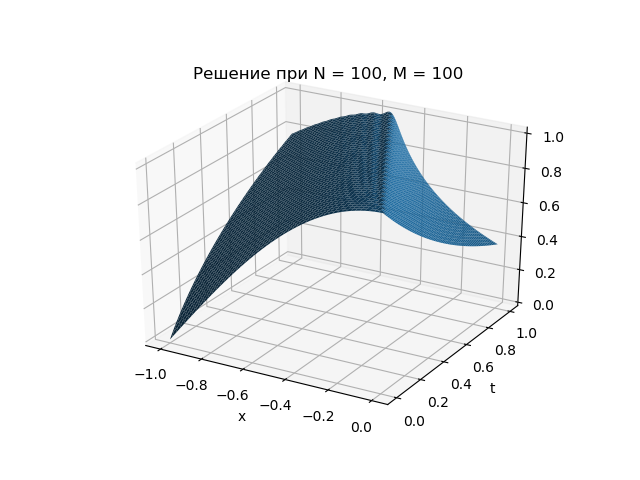

In [104]:
epsilon = 1e-6    # точность в методе Ньютона
N = 100; M = 100    # количество шагов по x и y
T_start = 0; T_end = 1     # границы сетки
X_start = 0; X_end = -1

h_x=(X_end - X_start)/(N-1)    # элементарные шаги
h_t=(T_end - T_start)/(M-1)


y1=np.zeros((M,N))    # массив, в ячейках которого будут храниться искомые значения

for n in np.arange(N):     # начальные условия
        y1[0][n] = (cos(pi * h_x * n * 0.5))

for m in np.arange(M):     # граничные условия
        y1[m][0] = exp(-h_t * m)
        


eps = epsilon + 1; # метод Ньютона
while eps > epsilon:
    eps = 0
    for m in np.arange(M)[0:M-1]:
        for n in np.arange(N)[0:N-1]:
            ep = f(m+1, n+1,y1) / df( m+1, n+1,y1)
            y1[m+1][n+1] = y1[m+1][n+1] - ep
            if abs(ep) > eps:
                eps = abs(ep)
                
# график решения
tm = np.linspace(T_start,T_end, num=M)
xn = np.linspace(X_start, X_end, num=N)

X, T = np.meshgrid(xn, tm)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, T, y1)
plt.title('Решение при N = 100, M = 100')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

## Расчет для сетки с N = 50, M = 50 

<IPython.core.display.Javascript object>


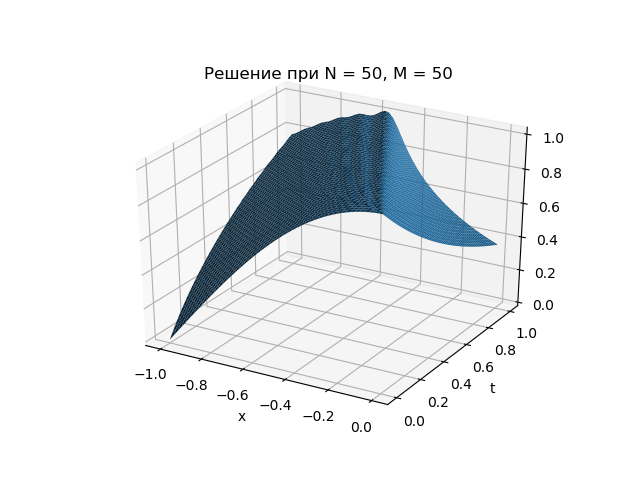

In [105]:
# Сетка меньше в 2 раза

epsilon = 1e-6    # точность в методе Ньютона
N = 50; M = 50    # количество шагов по x и y
T_start = 0; T_end = 1     # границы сетки
X_start = 0; X_end = -1

h_x=(X_end - X_start)/(N-1)    # элементарные шаги
h_t=(T_end - T_start)/(M-1)

y2=np.zeros((M,N))    # массив, в ячейках которого будут храниться искомые значения

for n in np.arange(N):     # начальные условия
        y2[0][n] = (cos(pi * h_x * n * 0.5))

for m in np.arange(M):     # граничные условия
        y2[m][0] = exp(-h_t * m)
        

eps = epsilon + 1; # метод Ньютона
while eps > epsilon:
    eps = 0
    for m in np.arange(M)[0:M-1]:
        for n in np.arange(N)[0:N-1]:
            ep = f(m+1, n+1, y2) / df( m+1, n+1, y2)
            y2[m+1][n+1] = y2[m+1][n+1] - ep
            if abs(ep) > eps:
                eps = abs(ep)
                
# график решения
tm = np.linspace(T_start,T_end, num=M)
xn = np.linspace(X_start, X_end, num=N)

X, T = np.meshgrid(xn, tm)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, T, y2)
plt.title('Решение при N = 50, M = 50')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

## Код для сетки с N = 25, M = 25 

<IPython.core.display.Javascript object>


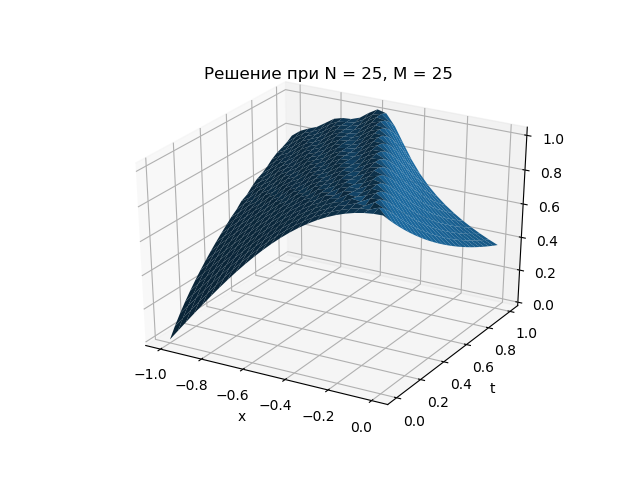

In [106]:
# Сетка меньше в 4 раза

epsilon = 1e-6    # точность в методе Ньютона
N = 25; M = 25    # количество шагов по x и y
T_start = 0; T_end = 1     # границы сетки
X_start = 0; X_end = -1

h_x=(X_end - X_start)/(N-1)    # элементарные шаги
h_t=(T_end - T_start)/(M-1)

y3=np.zeros((M,N))    # массив, в ячейках которого будут храниться искомые значения

for n in np.arange(N):     # начальные условия
        y3[0][n] = (cos(pi * h_x * n * 0.5))

for m in np.arange(M):     # граничные условия
        y3[m][0] = exp(-h_t * m)
        
        
eps = epsilon + 1; # метод Ньютона
while eps > epsilon:
    eps = 0
    for m in np.arange(M)[0:M-1]:
        for n in np.arange(N)[0:N-1]:
            ep = f(m+1, n+1, y3) / df( m+1, n+1, y3)
            y3[m+1][n+1] = y3[m+1][n+1] - ep
            if abs(ep) > eps:
                eps = abs(ep)
                
# график решения
tm = np.linspace(T_start,T_end, num=M)
xn = np.linspace(X_start, X_end, num=N)

X, T = np.meshgrid(xn, tm)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, T, y3)
plt.title('Решение при N = 25, M = 25')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

## Проверка выполнения начального и граничного условия на последней сетке

In [107]:
print("Разница между начальными условиями и значениями функции при t=0: ")
for n in np.arange(N):
        print((cos(pi * h_x * n * 0.5)) - y3[0][n], end='; ')
print("")
        
print("Разница между граничными условиями и значениями функции при x=0: ")
for m in np.arange(M):
        print(exp(-h_t * m) - y3[m,0], end='; ')


Разница между начальными условиями и значениями функции при t=0: 
0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 
Разница между граничными условиями и значениями функции при x=0: 
0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 

**Граничные и начальные условия выполнены.**

## Сходимость

<IPython.core.display.Javascript object>


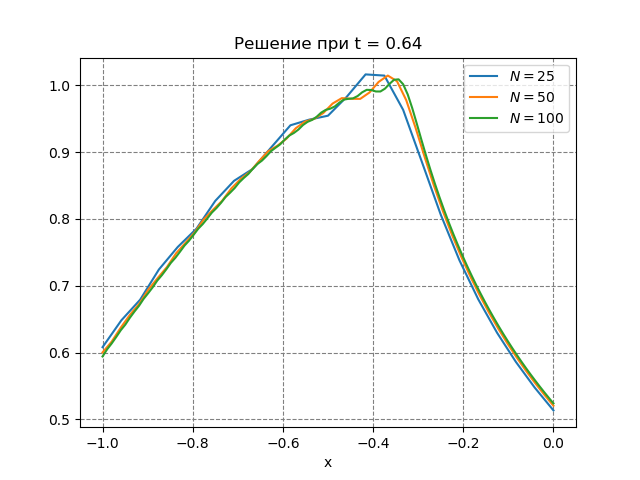

In [111]:
fig = plt.figure()
ax = fig.add_subplot(111)
surf = ax.plot(np.linspace(X_start, X_end, num=25),y3[16][:],label='$N = 25$')
surf = ax.plot(np.linspace(X_start, X_end, num=50),y2[32][:],label='$N = 50$')
surf = ax.plot(np.linspace(X_start, X_end, num=100),y1[64][:],label='$N = 100$')
ax.grid(which='major', color = 'gray',ls='--')
ax.legend(loc='best')

plt.title('Решение при t = 0.64')
plt.xlabel('x')
plt.show()